This project is done partly based on my RA duties for the Center for Community-Engaged AI, and the primary data source is not open source but can be requested from the authors of the paper. All related work and code are hosted on a private github page, to which Professor Mattei has rights to. I am working alone for this Fall 2023 Data Science Project. However, there will be some input from the CCEA on this project, as they are the stakeholders of the larger research project.

There are three datasets that I am using for this project. My approach is to have one main dataset that I am enriching from other sources, this main dataset is from the paper ‘Is It Harder for Older Workers to Find Jobs? New and Improved Evidence from a Field Experiment’ (1). The data enrichment is done with Unemployment Percentage (2) and GeoPy Nonimatim (3). 
The main dataset contains 40,208 resume applications, that were generated for a correspondence study to uncover age discrimination in job application. The generated resumes have been formulated to have as many controlled variables as possible and to seem realistic as possible. Each resume contains the applicants name, age, contact information, the job they applied to, their skill level, educational background, special skills, city and whether they got a callback. For each application, the main measurement is whether the resume received a callback. 

The unemployment percentage data is from the bureau of labor statistics and contains the employment and unemployment percentage for each respective state for each year. As the main data concerns only 2019, that is the only year I am interested in.

GeoPy Nonimatim is used to fetch the state for each city, as the resume applications contain only the city where the application was made. As the application corresponds to the location of the applicant, we only need to fetch one states information per application. 
The research questions I am looking to answer are the following.

1. Is there a relationship between gender, age, employment status when it comes to callbacks? How do these statistics change between states?
2. Does a states unemployment rate affect 

The parsing and cleaning of the data was rather straightforward, the most difficult part was deciding which columns to drop. Thus, the current choice of columns is not final,but there were originally 142 columns. I was originally using modular one-time cleaning scripts for my data and some manual precursory cleaning, and had to reformat them to a jupyter notebook form. This caused mostly a visual challenge to the viewer, as it causes unnecessary clutter. 

(1)	https://www.journals.uchicago.edu/doi/10.1086/701029

(2)	https://www.bls.gov/web/laus/laumstrk.htm

(3)	https://geopy.readthedocs.io/en/stable/


In [3]:
import sys  
from scipy import stats
import os
import pandas as pd


#This is the part where we run some basic cleaning and data enriching, to add the state 
script_directory = os.getcwd() #get out current working directory, more reliable than appending absolute path
if script_directory+ '\\scripts\\' not in sys.path:
    sys.path.insert(0, script_directory + '\\scripts\\') #Import our helper scripts

from helper_scripts import *

data = set_state() #Calls to parse and clean the mergefinal and adds the state using geopy
data



C:\Users\SariolaDisaA\Documents\Data Science\Data Science Project\scripts\helper_scripts.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['state'] = ''


,jobid,dateposted,datesent,timesent,craigslistsubmarket,tripletfolder,companyname,adtitle,documentsthatwererequested,raname,...,oldstrong,agegroup,middlemale,oldmale,middlefemale,oldfemale,clusterid,spamad,_merge,state
0,1.000000e+00,5/18/15,42147.0,13:33,westside-southbay,18.0,,"ÊAdministrative Assistant, Leading Media Firm ...",buzzwords,Chenxu Guo,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0,master only (1),California
1,1.000000e+00,5/18/15,42145.0,18:47,westside-southbay,18.0,,"ÊAdministrative Assistant, Leading Media Firm ...",buzzwords,Chenxu Guo,...,1.0,3.0,0.0,0.0,0.0,1.0,1,0,master only (1),California
2,1.000000e+00,5/18/15,42146.0,12:22,westside-southbay,18.0,,"ÊAdministrative Assistant, Leading Media Firm ...",buzzwords,Chenxu Guo,...,1.0,3.0,0.0,0.0,0.0,1.0,1,0,master only (1),California
3,4.865393e+06,1/27/15,42031.0,7:15:00 AM,Broward County,27.0,Furniture Store,SALES ASSOCIATE DESIGNER - PART TIME (fort lau...,,Eileen,...,0.0,2.0,1.0,0.0,0.0,0.0,4865393,0,matched (3),Florida
4,4.865393e+06,1/27/15,42031.0,12:00:00 AM,Broward County,27.0,Furniture Store,SALES ASSOCIATE DESIGNER - PART TIME (fort lau...,,Eileen,...,0.0,1.0,0.0,0.0,0.0,0.0,4865393,0,matched (3),Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40276,5.075850e+09,6/15/15,42171.0,1:36,westside-southbay,15.0,,ÊOffice Services Assistant $15.00/hrÊ(Beverly ...,buzzwords,Chenxu Guo,...,0.0,1.0,0.0,0.0,0.0,0.0,5075849740,0,matched (3),California
40277,5.075850e+09,6/15/15,42172.0,11:11,westside-southbay,15.0,,ÊOffice Services Assistant $15.00/hrÊ(Beverly ...,buzzwords,Chenxu Guo,...,1.0,3.0,0.0,0.0,0.0,1.0,5075849740,0,matched (3),California
40278,5.075850e+09,6/15/15,42171.0,16:16,westside-southbay,15.0,,ÊOffice Services Assistant $15.00/hrÊ(Beverly ...,buzzwords,Chenxu Guo,...,1.0,3.0,0.0,0.0,0.0,1.0,5075849740,0,matched (3),California
40279,NaN,,NaN,,,NaN,,,,,...,0.0,NaN,NaN,NaN,NaN,NaN,.,0,master only (1),


In [4]:
#These are not here instead of the scripts, since this shows the columns we are keeping and some idea of the cleaning that is done.
data_cleaned = data[['city','occupation','type','template', 'zipcode', 'age', 'employment','scriptsubject','missingskill1', 'missingskill2', 'middle', 'old',
                     'middlehigh','oldhigh','spanish','computer','liscense','certificate','customerservice','cpr','techskills','wpm','grammar','college',
                     'employeemonth','volunteer','stronglaw','middlestrong','oldstrong','agegroup','middlemale','oldmale','middlefemale','oldfemale',
                     'scriptopening','scriptbody', 'scriptsignature', 'skill', 'callback', 'state', 'companyname', 'adtitle', 'gender', 'type', 'template', 
                     'highschool', 'postsecondary', 'oldfemale']]

#We clean up the ad titles, do things like remove items in paranthesis, 
data_cleaned.adtitle = data_cleaned.adtitle.replace(r'(Ê|@|>|#|:|;|-|\*|\$|\+|\/|,|\(.*\)|\d.hr+|\d.k+|\.|\d|\!)',' ', regex=True).str.lower()
data_cleaned.adtitle = data_cleaned.adtitle.replace(r'(\s{2,}|\t)', ' ', regex=True) #After the above we might have double or more spaces, so we remove them. We have to do this as if we dont add the space above, we end up titles with words stuck together
data_cleaned = data_cleaned.iloc[:40279] #Since above printout shows that the two last rows are nonsense.
#since 37114  and 37124 are INVALID LINES IN THE RAW DATA, THEY NEED TO BE MANUALLY DELETED
data_cleaned = data_cleaned.drop(labels=37124, axis=0)
data_cleaned = data_cleaned.drop(labels=37114, axis=0)



data_cleaned.to_csv(script_directory + '\\Data\\unemployment_with_state.csv', index=False)
data_cleaned

#We generate the tables for statistics
gen_unemployment_csv()


C:\Users\SariolaDisaA\AppData\Local\Temp\ipykernel_32072\3172107058.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.adtitle = data_cleaned.adtitle.replace(r'(Ê|@|>|#|:|;|-|\*|\$|\+|\/|,|\(.*\)|\d.hr+|\d.k+|\.|\d|\!)',' ', regex=True).str.lower()
C:\Users\SariolaDisaA\AppData\Local\Temp\ipykernel_32072\3172107058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.adtitle = data_cleaned.adtitle.replace(r'(\s{2,}|\t)', ' ', regex=True) #After the above we might have double or mo

,State,Unemployment Percentage,Admin Employed,Admin Unemployed,Security Employed,Security Unemployed,Janitor Employed,Janitor Unemployed,Sales Employed,Sales Unemployed
0,"Pennsylvania, High",4.325000,36.036036,37.500000,35.897436,35.483871,24.561404,36.666667,33.333333,22.764228
1,"Pennsylvania, Low",4.325000,13.023256,27.083333,35.897436,31.182796,23.333333,40.000000,47.058824,27.976190
2,"Illinois, High",3.966667,11.176471,7.246377,24.000000,17.948718,12.289157,9.195402,25.000000,25.702811
3,"Illinois, Low",3.966667,6.695464,0.000000,9.523810,22.895623,8.934708,5.128205,30.303030,19.420290
4,"Michigan, High",4.066667,12.264151,33.333333,33.333333,26.388889,9.824561,35.897436,20.000000,33.333333
5,"Michigan, Low",4.066667,11.209440,10.000000,6.666667,17.460317,14.678899,27.692308,40.000000,26.881720
6,"Arizona, High",4.808333,12.930012,33.333333,43.137255,28.000000,12.100457,44.791667,27.777778,23.333333
7,"Arizona, Low",4.808333,9.701493,46.031746,42.857143,22.764228,11.241830,42.222222,48.333333,23.809524
8,"Utah, High",2.541667,19.307832,45.454545,45.833333,45.977011,20.430108,41.176471,33.333333,43.750000
9,"Utah, Low",2.541667,14.583333,46.666667,44.444444,41.304348,17.488789,33.333333,33.333333,40.579710


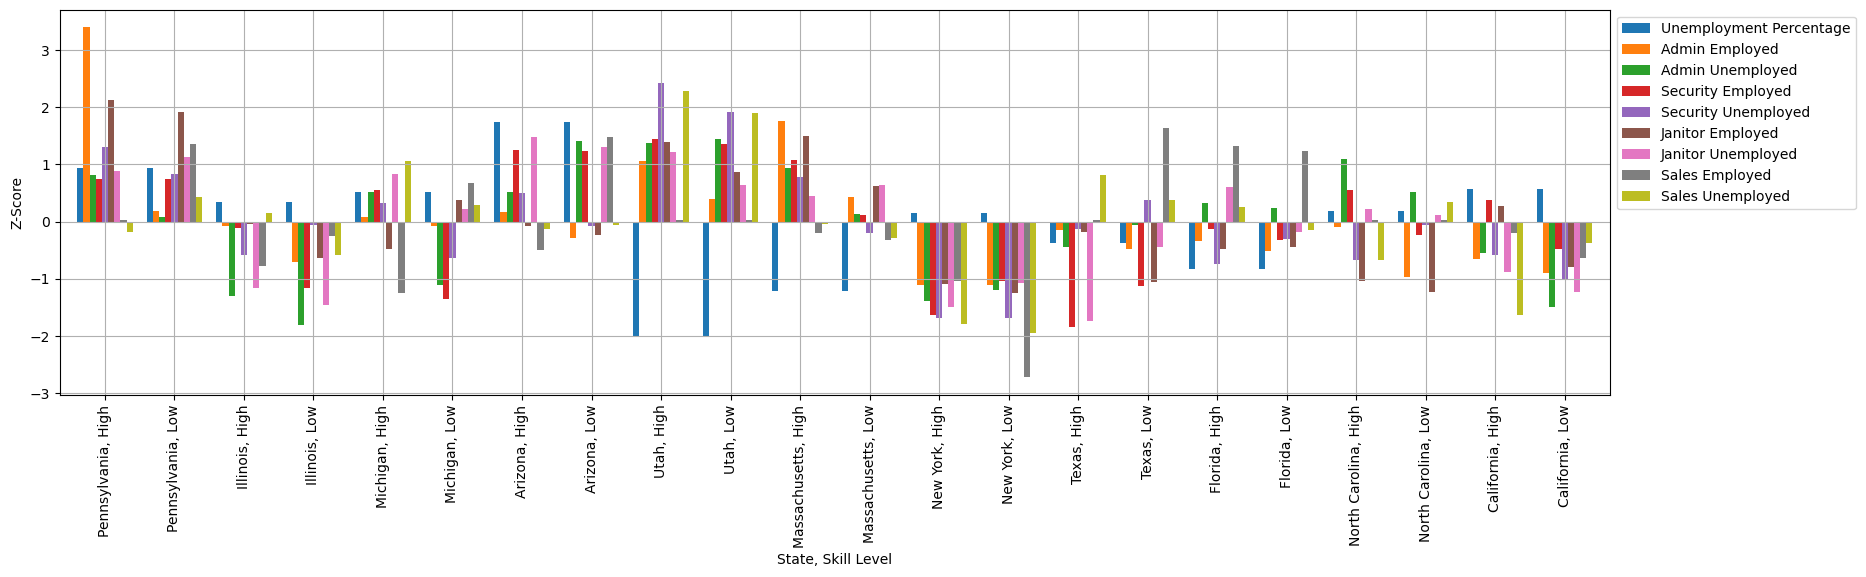

In [10]:
from scipy import stats

df = pd.read_csv(script_directory +'\\Data\\unemployment_percentage_state.csv')
df
for column in df.columns[1:]:
    df[column] = stats.zscore(df[column])
    
ax = df.plot(x='State', figsize=(20,5),grid=True, width=0.8,  kind='bar', xlabel ='State, Skill Level', ylabel='Z-Score').legend(bbox_to_anchor=(1, 1))
fig = ax.get_figure()
fig.savefig(script_directory + '//Figures//unemployment_percentage_state.png')
